In [9]:
import os
import sys
import cv2
import random
import math
import numpy as np
import imutils
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = 'd:/works/github/Mask_RCNN' 

# Import Mask RCNN
#ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)
print(ROOT_DIR)
from samples.balloon import balloon
from mrcnn.model import log
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
#import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "samples/logs")
print(MODEL_DIR)
# Local path to trained weights file
MY_MODEL_PATH = os.path.join(ROOT_DIR, "logs/shapes20200528T2341/mask_rcnn_shapes_0040.h5")
print(MY_MODEL_PATH)
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
#IMAGE_DIR = os.path.join(ROOT_DIR, "images")

d:/works/github/Mask_RCNN
d:/works/github/Mask_RCNN\samples/logs
d:/works/github/Mask_RCNN\logs/shapes20200528T2341/mask_rcnn_shapes_0040.h5


In [2]:
para = [1,10,50,50,0.025]

config = balloon.BalloonConfig()

config.DETECTION_MAX_INSTANCES = para[0]
config.POST_NMS_ROIS_INFERENCE = para[1]
config.PRE_NMS_LIMIT = para[2]
config.STEPS_PER_EPOCH = para[3]
config.WEIGHT_DECAY = para[4]

config.display()
#BALLOON_DIR = os.path.join(ROOT_DIR, 'datasets')
#print(BALLOON_DIR)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        1
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE           

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(MY_MODEL_PATH, by_name=True)

W0707 09:15:54.181191  1304 deprecation_wrapper.py:119] From C:\Users\joyce\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 09:15:54.280416  1304 deprecation_wrapper.py:119] From C:\Users\joyce\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 09:15:54.292379  1304 deprecation_wrapper.py:119] From C:\Users\joyce\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 09:15:54.335117  1304 deprecation_wrapper.py:119] From C:\Users\joyce\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0707 09:15:54.341070  1304 deprecation_wrapper.py:119]

Re-starting from epoch 40


In [4]:
class_names = ['BG','Red_Pyramid']

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

Processing 1 images
image                    shape: (235, 322, 3)         min:    0.00000  max:  207.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  100.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
start running
after detection


<module 'matplotlib.pyplot' from 'C:\\Users\\joyce\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

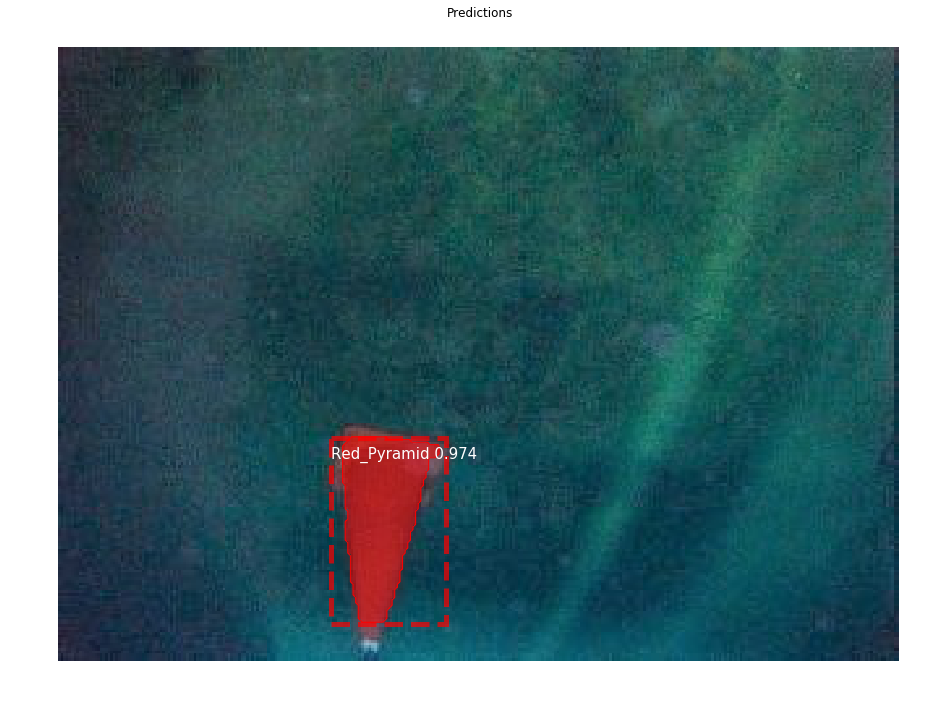

In [5]:
image = skimage.io.imread('d:/downloads/1593757456_2_1.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'], ax=ax,
                            title="Predictions")

# Get Hsv

辨識成功，可抓取其HSV值



all_point_B_2 = np.percentile(all_point_B, (5,95), interpolation='midpoint')

all_point_G_2 = np.percentile(all_point_G, (5,95), interpolation='midpoint')

all_point_R_2 = np.percentile(all_point_R, (5,95), interpolation='midpoint')

▲
此三行之(5,95)為抓取區域百分比，僅抓取5%-95%數值，參數可更改


###


lower = np.array([114.0,44.0,71.0])

upper = np.array([144.0,111.5,123.0])

▲
此兩行為抓取結果，可直接使用

In [6]:
all_point_a = []
all_point_b = []

point_num = 0
a = 0
for lines in r['masks']:
    b = 0
    for item in lines:
        c = 0
        for its in item:
            if its == True:
                all_point_a.append(a)
                all_point_b.append(b)
                point_num = point_num + 1
            c = c + 1
        b = b + 1
    a = a + 1

In [12]:
all_point_color = []
for alli in range(len(all_point_a)):
    all_point_color.append(image_hsv[all_point_a[alli], all_point_b[alli]])

all_point_B = []
all_point_G = []
all_point_R = []

for ii in range(len(all_point_color)):
    all_point_B.append(all_point_color[ii][0])
    all_point_G.append(all_point_color[ii][1])
    all_point_R.append(all_point_color[ii][2])

all_point_B_2 = np.percentile(all_point_B, (5,95), interpolation='midpoint')
all_point_G_2 = np.percentile(all_point_G, (5,95), interpolation='midpoint')
all_point_R_2 = np.percentile(all_point_R, (5,95), interpolation='midpoint')

minn = 'lower = np.array(['+str(min(all_point_B_2))+','+str(min(all_point_G_2))+','+str(min(all_point_R_2))+'])'
maxx = 'upper = np.array(['+str(max(all_point_B_2))+','+str(max(all_point_G_2))+','+str(max(all_point_R_2))+'])'

print(minn)
print(maxx)

lower = np.array([114.0,44.0,71.0])
upper = np.array([144.0,111.5,123.0])


# Test Code

測試用程式

In [14]:
image = skimage.io.imread('d:/downloads/1593757456_2_1.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower = np.array([114.0,44.0,71.0])
upper = np.array([144.0,111.5,123.0])
red_mask = cv2.inRange(image_hsv, lower, upper)

tocont = False
contours = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
for contour in contours:
    ara = cv2.contourArea(contour)
    if ara > 20:
        print(ara)
        area_red = ara
        x, y, w, h = cv2.boundingRect(contour)
        aft_frame = cv2.rectangle(image, (x, y), (x+w, y+h), (255,0,0), 5)
        
cv2.imshow('aft', aft_frame)

cv2.waitKey(0)
cv2.destroyAllWindows()

1632.5
23.5
154.5
